In [145]:
#Import all the libraries we are going to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [146]:
#tit_all = concat(pd.read_csv('C:/Users/927278/Documents/Titanic Kaggle/train.csv',pd.read_csv('C:/Users/927278/Documents/Titanic Kaggle/test.csv') , axis = 1)

In [156]:
#Import the training and test datasets
titanic_train = pd.read_csv('C:/Users/927278/Documents/Titanic Kaggle/train.csv')
titanic_test = pd.read_csv('C:/Users/927278/Documents/Titanic Kaggle/test.csv')

In [160]:
#Check the layout of the imported data - only difference is that the test data doesn't have the Survived outcome
#Combine train and test data so that we do preprocessing once
titanic_full = pd.concat([titanic_train,titanic_test],axis=0)
titanic_full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [161]:
titanic_full.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [162]:
#Check if any fields have missing values

titanic_full.isnull().sum()


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [163]:
#Check if we can extract any information from the alphabetical parts of the ticket
titanic_full['Ticket'][titanic_full['Ticket']
                  .map( lambda tick: tick.split(' ')[0][0]).str.isalpha()].map( lambda tick: tick.split(' ')[0]).value_counts()
#There are too many different values so the conclusion is to drop this column altogether

PC            92
C.A.          46
SOTON/O.Q.    16
W./C.         14
STON/O        14
CA.           12
A/5           12
SC/PARIS      11
A/5.          10
CA            10
F.C.C.         9
C              8
SOTON/OQ       8
S.O./P.P.      7
S.O.C.         7
STON/O2.       7
A/4            6
SC/Paris       5
SC/AH          5
LINE           4
PP             4
F.C.           3
S.C./PARIS     3
SOTON/O2       3
A.5.           3
A./5.          3
A/4.           3
P/PP           2
WE/P           2
SC             2
W.E.P.         2
S.P.           1
W/C            1
LP             1
A/S            1
SC/A.3         1
SCO/W          1
S.C./A.4.      1
STON/OQ.       1
A4.            1
SC/A4          1
AQ/4           1
Fa             1
SW/PP          1
S.O.P.         1
S.W./PP        1
C.A./SOTON     1
A.             1
SO/C           1
AQ/3.          1
Name: Ticket, dtype: int64

In [173]:
#Create categorical variables
sex = pd.get_dummies(titanic_full['Sex'],drop_first=True)
embarked = pd.get_dummies(titanic_full['Embarked'],drop_first=True)

In [174]:
#Extract titles and check value counts
titanic_full['Name'].map(lambda name: name.split(',')[1].split('.')[0]).value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Capt              1
 Mme               1
 the Countess      1
 Don               1
 Dona              1
 Lady              1
 Sir               1
 Jonkheer          1
Name: Name, dtype: int64

In [175]:
#Create a new variable from passenger titles
title = pd.DataFrame()
title['Title'] = titanic_full['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# map all the titles
Title_Dictionary = {
                    "Mr"  :       "Mr",
                    "Miss"  :     "Ms",      
                    "Mrs"   :     "Mrs",     
                    "Master" :    "Mr2",     
                    "Dr"     :    "Off",     
                    "Rev"    :    "Off",     
                    "Col"    :    "Off",     
                    "Major"  :    "Off",     
                    "Mlle"   :    "Ms" ,     
                    "Mme"    :    "Mrs",
                    "Jonkheer":   "Off2",
                    "Ms"     :    "Ms",      
                    "Capt"   :    "Off",       
                    "Don"    :    "Off2",       
                    "Lady"   :    "Off2",       
                    "Sir"    :    "Off2",       
                    "the Countess" : "Off2"     
                    }

title['Title'] = title['Title'].map(Title_Dictionary)
title = pd.get_dummies(title['Title'])

In [176]:
#Drop columns we are not going to use as well as dummy columns

titanic2 = pd.concat([titanic_full.drop(['Sex','Name','Ticket','Cabin','Embarked'],axis =1 ),sex,embarked,title],axis=1)
#Impute
titanic2['Age'].fillna(titanic2['Age'].mean(),inplace=True)
titanic2['Fare'].fillna(titanic2['Fare'].mean(),inplace=True)


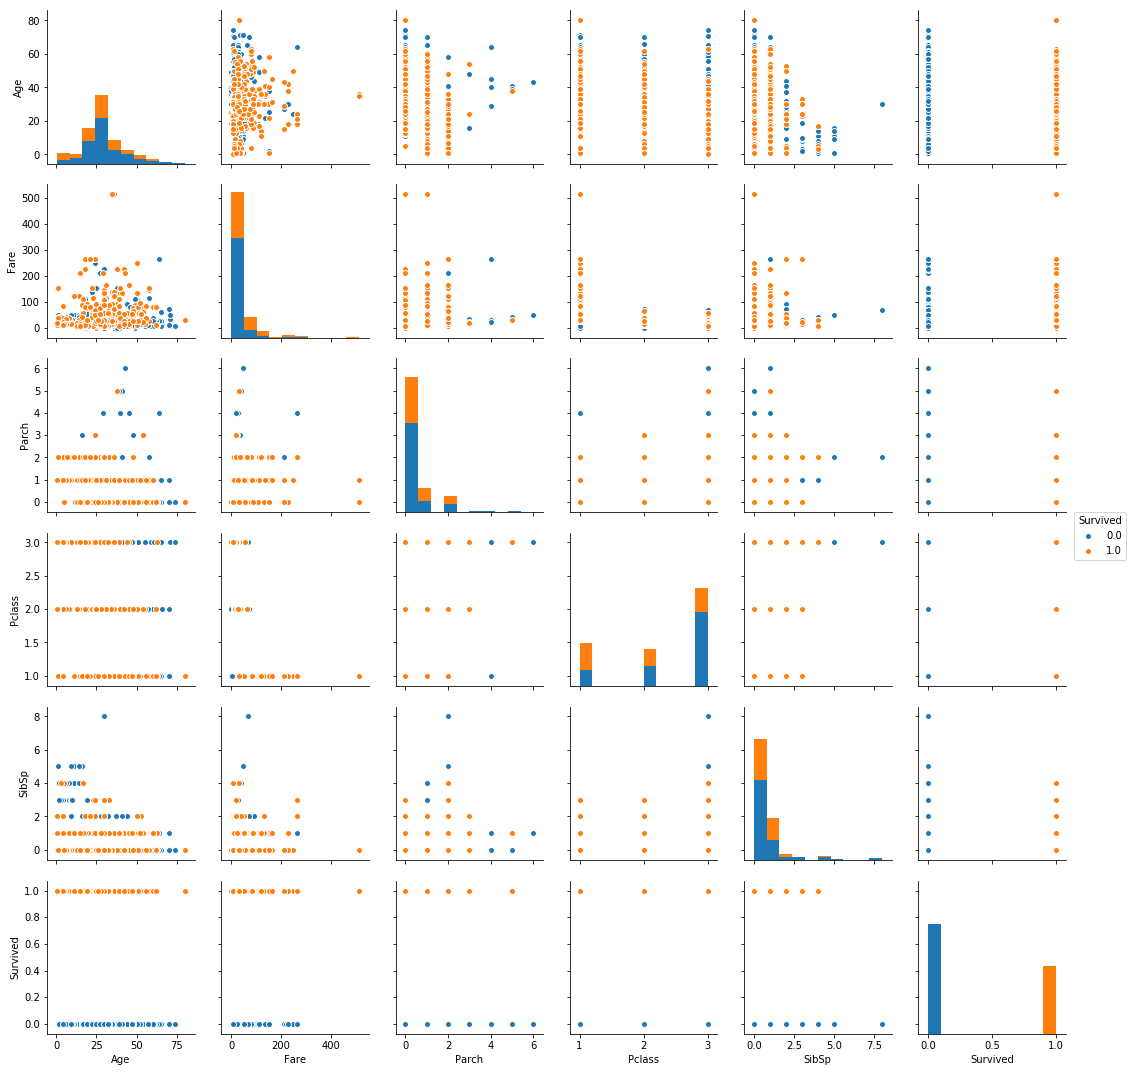

In [185]:
sns.pairplot(data = titanic2[['Age','Fare','Parch','Pclass','SibSp','Survived']][:891],hue='Survived')

In [206]:
#Split the dataset before running it through the model
final_test = titanic2[891:]
final_train = titanic2[:891]
print(final_test.shape,final_train.shape)
final_train.columns

(418, 16) (891, 16)


Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived',
       'male', 'Q', 'S', 'Mr', 'Mr2', 'Mrs', 'Ms', 'Off', 'Off2'],
      dtype='object')

In [207]:
#Select X and y
X = final_train.drop(['PassengerId','Survived'],axis=1)
y = final_train['Survived']

In [252]:
#Perform Logistic regression
logmodel = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [253]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[156  23]
 [ 30  86]]
             precision    recall  f1-score   support

        0.0       0.84      0.87      0.85       179
        1.0       0.79      0.74      0.76       116

avg / total       0.82      0.82      0.82       295



In [254]:
logmodel.score(X_test,y_test)

0.8203389830508474

In [255]:
X_test.head()

,Age,Fare,Parch,Pclass,SibSp,male,Q,S,Mr,Mr2,Mrs,Ms,Off,Off2
782,29.000000,30.0000,0,1,0,1,0,1,1,0,0,0,0,0
714,52.000000,13.0000,0,2,0,1,0,1,1,0,0,0,0,0
233,5.000000,31.3875,2,3,4,0,0,1,0,0,0,1,0,0
531,29.881138,7.2292,0,3,0,1,0,0,1,0,0,0,0,0
526,50.000000,10.5000,0,2,0,0,0,1,0,0,0,1,0,0


In [239]:
final_test.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,male,Q,S,Mr,Mr2,Mrs,Ms,Off,Off2
0,34.5,7.8292,0,892,3,0,NaN,1,1,0,1,0,0,0,0,0
1,47.0,7.0000,0,893,3,1,NaN,0,0,1,0,0,1,0,0,0
2,62.0,9.6875,0,894,2,0,NaN,1,1,0,1,0,0,0,0,0
3,27.0,8.6625,0,895,3,0,NaN,1,0,1,1,0,0,0,0,0
4,22.0,12.2875,1,896,3,1,NaN,0,0,1,0,0,1,0,0,0


In [243]:
#Run the test dataset to get predictions for the competition:
submission_pred = logmodel.predict(final_test.drop(['PassengerId','Survived'], axis=1))

In [244]:
submission = pd.DataFrame({'PassengerId' : final_test['PassengerId'],
                           'Survived' : submission_pred})
submission.tail()

,PassengerId,Survived
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
417,1309,1.0


In [245]:
submission.to_csv('C:/Users/927278/Documents/Titanic Kaggle/submission2.csv')

In [264]:
#Test Random Forests
from sklearn.ensemble import RandomForestClassifier

list1=[]
    
for i in (50,100,150,200,300,400,500,750,100):
    ranfor = RandomForestClassifier(n_estimators=i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
    ranfor.fit(X_train,y_train)
    predictions = ranfor.predict(X_test)
    list1.append([i,ranfor.score(X_test,y_test)])
    
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
#print(ranfor.score(X_test,y_test))

In [265]:
print(list1)

[[50, 0.8022388059701493], [100, 0.8246268656716418], [150, 0.8246268656716418], [200, 0.8171641791044776], [300, 0.7947761194029851], [400, 0.8171641791044776], [500, 0.835820895522388], [750, 0.8171641791044776], [100, 0.8283582089552238]]
